# **유방암 데이터분석**

**개요**



*   유방암 데이터를 통한 암세포의 특징 추출과 진단 여부 예측



In [ ]:
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cancer_data = pd.read_csv('/content/drive/MyDrive/data.csv', header=0)
cancer_data2 = pd.read_csv('/content/drive/MyDrive/data.csv', header=0)  # model validation용
cancer_data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
cancer_data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


**결측치 확인**

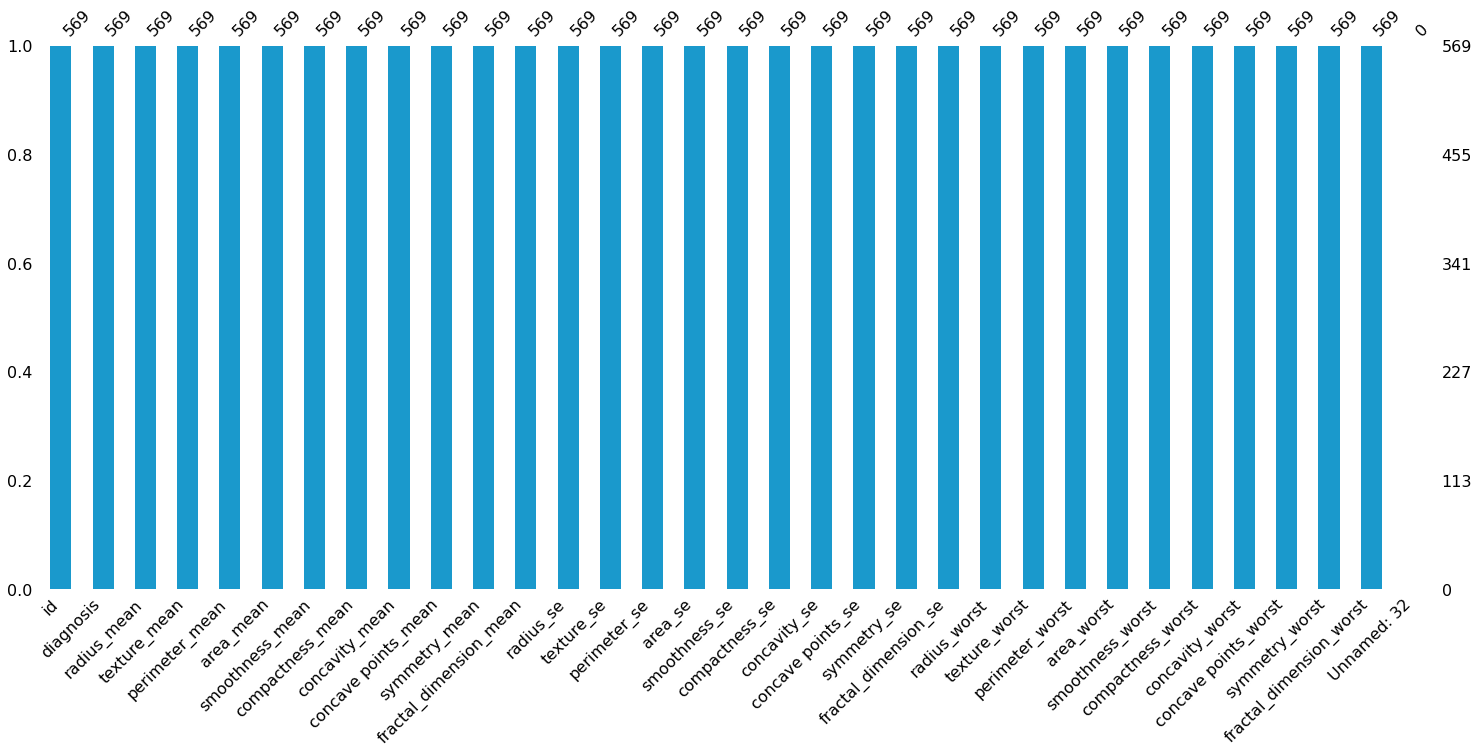

In [ ]:
msno.bar(cancer_data, color=(0.1, 0.6, 0.8))



*   데이터는 한 column을 제외하고 결측치는 없다.



**진단 데이터를 binary 데이터로 변경**

In [ ]:
cancer_data['diagnosis'] = cancer_data['diagnosis'].astype('category').cat.codes
cancer_data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


**목표 label인 diagnosis(진단)여부와 각 feature 확인**

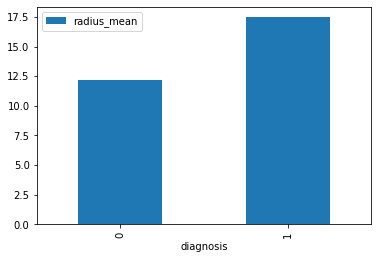

In [ ]:
cancer_data[['radius_mean', 'diagnosis']].groupby(['diagnosis']).mean().plot.bar()

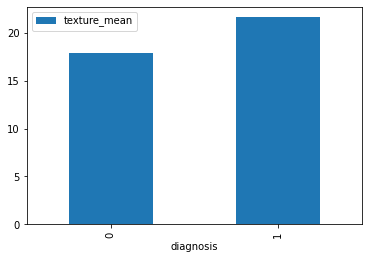

In [ ]:
cancer_data[['texture_mean', 'diagnosis']].groupby(['diagnosis']).mean().plot.bar()

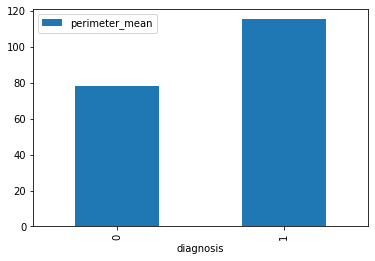

In [ ]:
cancer_data[['perimeter_mean', 'diagnosis']].groupby(['diagnosis']).mean().plot.bar()

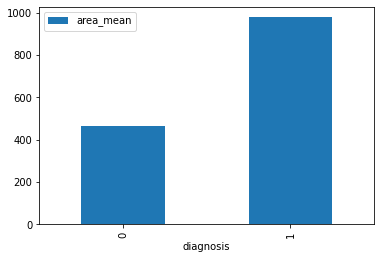

In [ ]:
cancer_data[['area_mean', 'diagnosis']].groupby(['diagnosis']).mean().plot.bar()

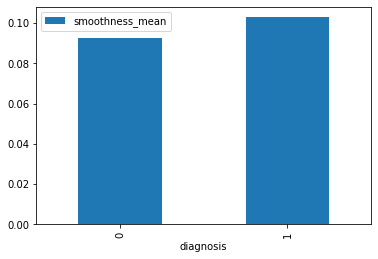

In [ ]:
cancer_data[['smoothness_mean', 'diagnosis']].groupby(['diagnosis']).mean().plot.bar()

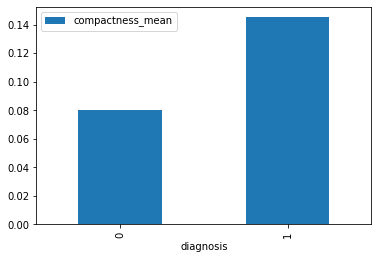

In [ ]:
cancer_data[['compactness_mean', 'diagnosis']].groupby(['diagnosis']).mean().plot.bar()

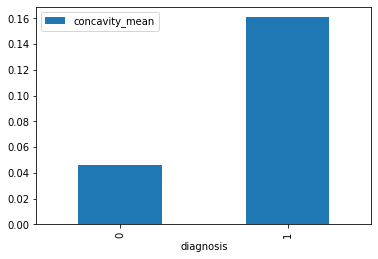

In [ ]:
cancer_data[['concavity_mean', 'diagnosis']].groupby(['diagnosis']).mean().plot.bar()

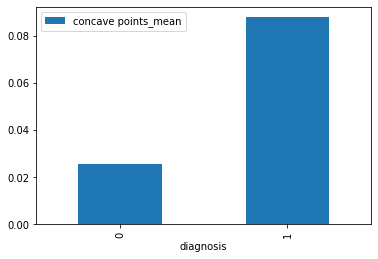

In [ ]:
cancer_data[['concave points_mean', 'diagnosis']].groupby(['diagnosis']).mean().plot.bar()

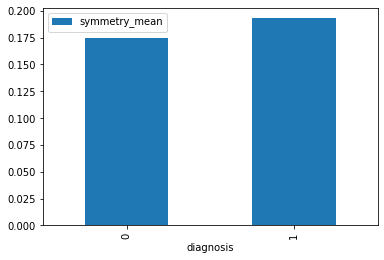

In [ ]:
cancer_data[['symmetry_mean', 'diagnosis']].groupby(['diagnosis']).mean().plot.bar()

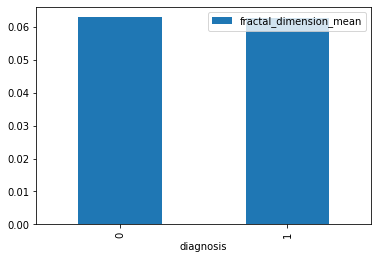

In [ ]:
cancer_data[['fractal_dimension_mean', 'diagnosis']].groupby(['diagnosis']).mean().plot.bar()

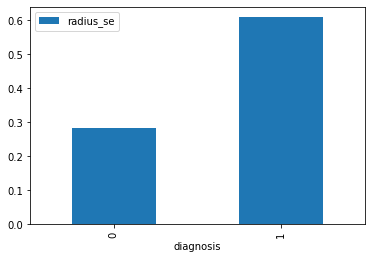

In [ ]:
cancer_data[['radius_se', 'diagnosis']].groupby(['diagnosis']).mean().plot.bar()

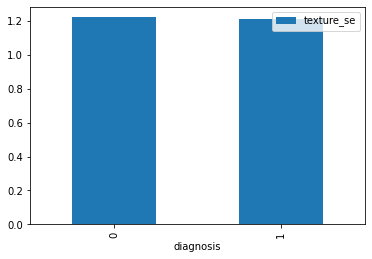

In [ ]:
cancer_data[['texture_se', 'diagnosis']].groupby(['diagnosis']).mean().plot.bar()

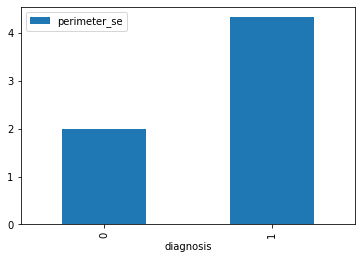

In [ ]:
cancer_data[['perimeter_se', 'diagnosis']].groupby(['diagnosis']).mean().plot.bar()

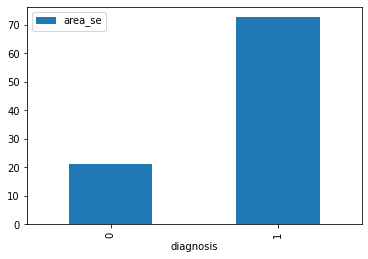

In [ ]:
cancer_data[['area_se', 'diagnosis']].groupby(['diagnosis']).mean().plot.bar()

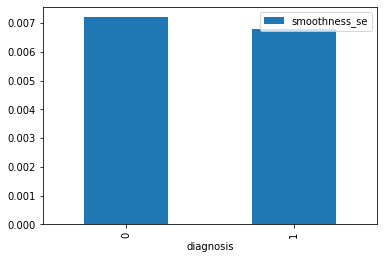

In [ ]:
cancer_data[['smoothness_se', 'diagnosis']].groupby(['diagnosis']).mean().plot.bar()

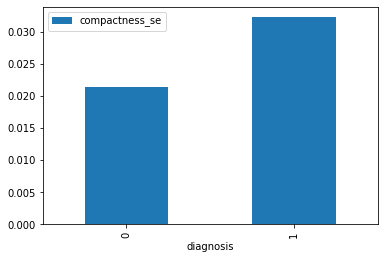

In [ ]:
cancer_data[['compactness_se', 'diagnosis']].groupby(['diagnosis']).mean().plot.bar()

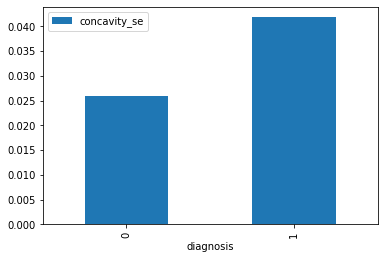

In [ ]:
cancer_data[['concavity_se', 'diagnosis']].groupby(['diagnosis']).mean().plot.bar()

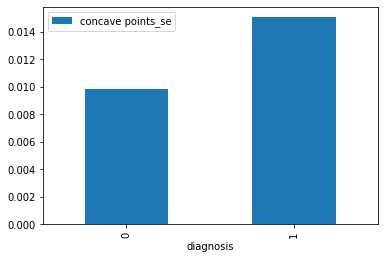

In [ ]:
cancer_data[['concave points_se', 'diagnosis']].groupby(['diagnosis']).mean().plot.bar()

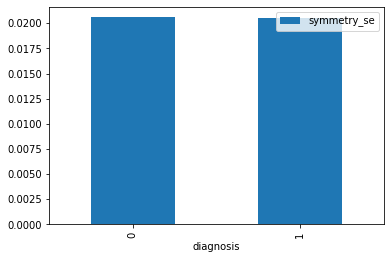

In [ ]:
cancer_data[['symmetry_se', 'diagnosis']].groupby(['diagnosis']).mean().plot.bar()

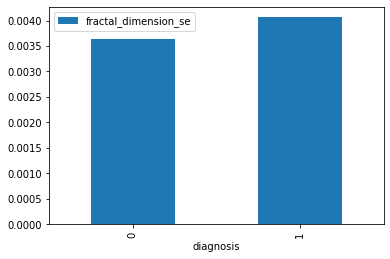

In [ ]:
cancer_data[['fractal_dimension_se', 'diagnosis']].groupby(['diagnosis']).mean().plot.bar()

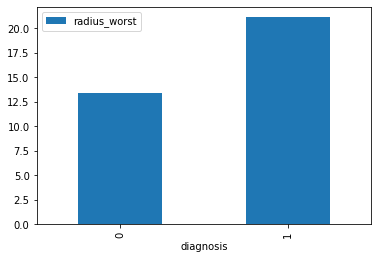

In [ ]:
cancer_data[['radius_worst', 'diagnosis']].groupby(['diagnosis']).mean().plot.bar()

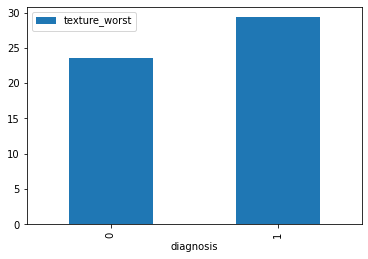

In [ ]:
cancer_data[['texture_worst', 'diagnosis']].groupby(['diagnosis']).mean().plot.bar()

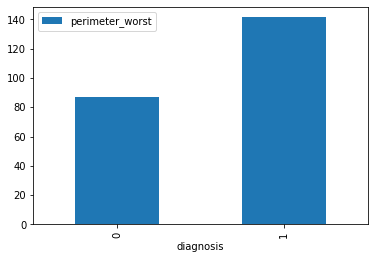

In [ ]:
cancer_data[['perimeter_worst', 'diagnosis']].groupby(['diagnosis']).mean().plot.bar()

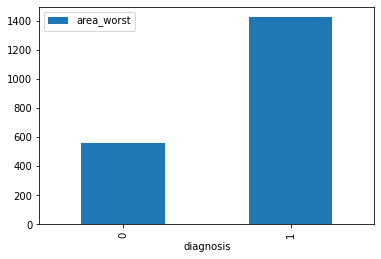

In [ ]:
cancer_data[['area_worst', 'diagnosis']].groupby(['diagnosis']).mean().plot.bar()

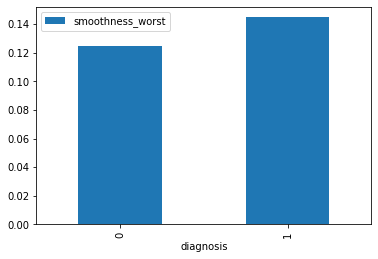

In [ ]:
cancer_data[['smoothness_worst', 'diagnosis']].groupby(['diagnosis']).mean().plot.bar()

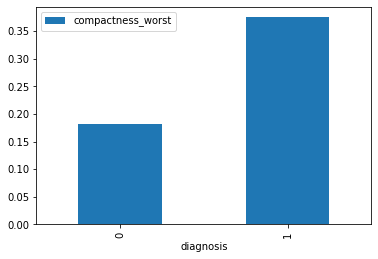

In [ ]:
cancer_data[['compactness_worst', 'diagnosis']].groupby(['diagnosis']).mean().plot.bar()

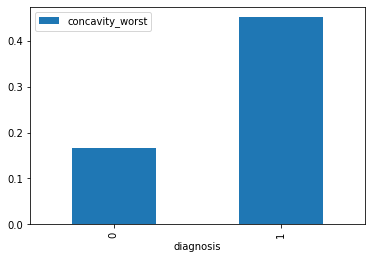

In [ ]:
cancer_data[['concavity_worst', 'diagnosis']].groupby(['diagnosis']).mean().plot.bar()

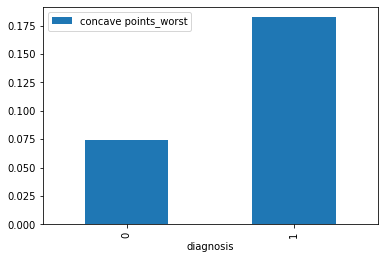

In [ ]:
cancer_data[['concave points_worst', 'diagnosis']].groupby(['diagnosis']).mean().plot.bar()

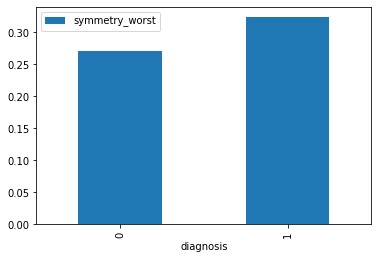

In [ ]:
cancer_data[['symmetry_worst', 'diagnosis']].groupby(['diagnosis']).mean().plot.bar()

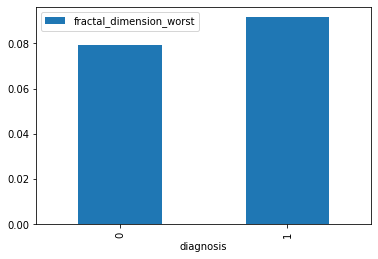

In [ ]:
cancer_data[['fractal_dimension_worst', 'diagnosis']].groupby(['diagnosis']).mean().plot.bar()



*   bar 그래프를 통해 진단 여부에 따른 특징의 평균을 시각화하였다. 모델 학습에서 평균이 비슷하다면 이상적인 결과를 얻기 어렵다고 판단하여 삭제하도록 하겠다.



In [ ]:
cancer_data.drop(columns=['id', 'fractal_dimension_mean', 'texture_se', 'symmetry_se', 'Unnamed: 32'], inplace=True)
cancer_data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'radius_se', 'perimeter_se',
       'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'fractal_dimension_se', 'radius_worst',
       'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
cancer_data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


**특징별 분포 파악**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

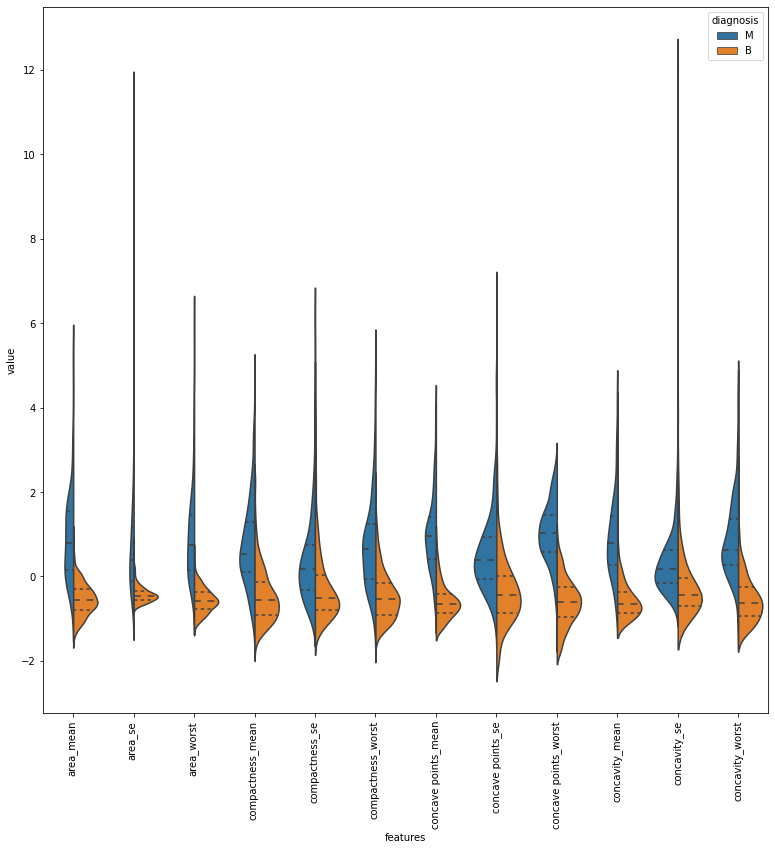

In [ ]:
cancer_data_n = (cancer_data - cancer_data.mean()) / cancer_data.std()
cancer_data_p1 = pd.concat([cancer_data['diagnosis'], cancer_data_n.iloc[:,0:12]], axis=1)
cancer_data_p1 = pd.melt(cancer_data_p1, id_vars="diagnosis", var_name="features", value_name='value')
plt.figure(figsize=(13,13))
sns.violinplot(x="features", y="value", hue="diagnosis", data=cancer_data_p1, split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

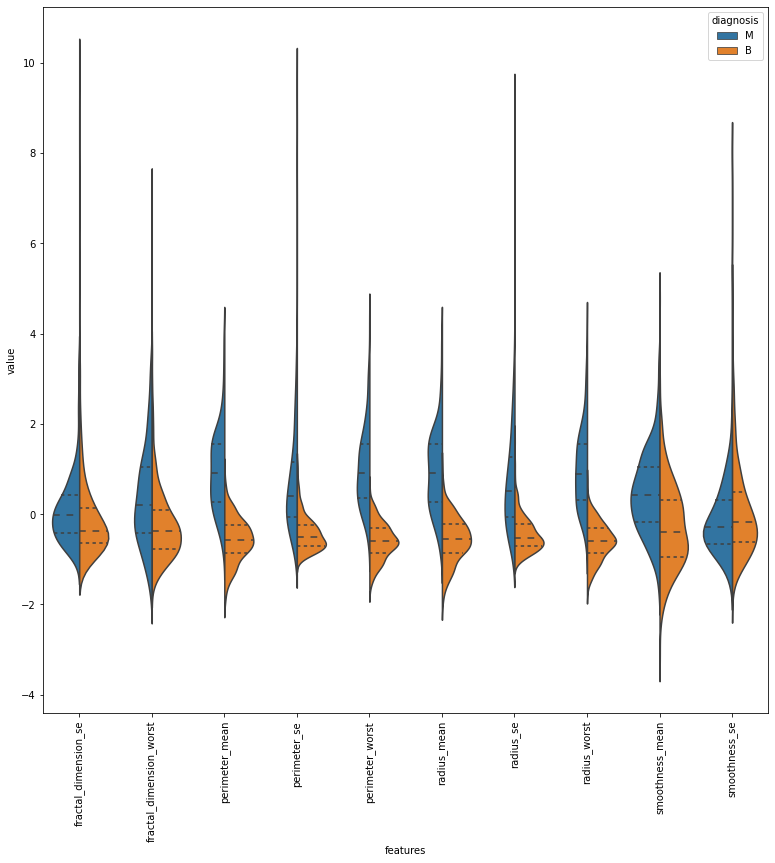

In [ ]:
cancer_data_p2 = pd.concat([cancer_data['diagnosis'], cancer_data_n.iloc[:,13:23]], axis=1)
cancer_data_p2 = pd.melt(cancer_data_p2, id_vars="diagnosis", var_name="features", value_name='value')
plt.figure(figsize=(13,13))
sns.violinplot(x="features", y="value", hue="diagnosis", data=cancer_data_p2, split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

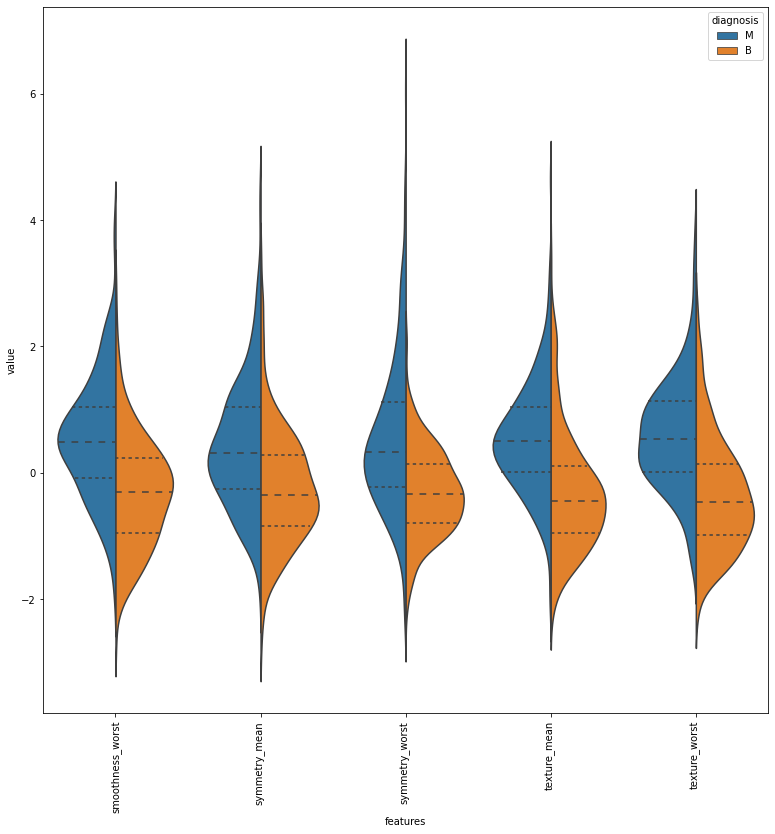

In [ ]:
cancer_data_p3 = pd.concat([cancer_data['diagnosis'], cancer_data_n.iloc[:,23:]], axis=1)
cancer_data_p3 = pd.melt(cancer_data_p3, id_vars="diagnosis", var_name="features", value_name='value')
plt.figure(figsize=(13,13))
sns.violinplot(x="features", y="value", hue="diagnosis", data=cancer_data_p3, split=True, inner="quart")
plt.xticks(rotation=90)



*   seaborn의 violinplot을 사용하여 각 특징별 분포를 시각화하였다. 여러 특징이 모두 암세포를 판별하는데 사용될 가능성은 있지만 너무 다양한 feature은 모델 학습에 Overfitting을 유발할 수 있다. 따라서 암 진단 여부에 따른 분포가 비슷한 특징은 삭제하고 진행하도록 하겠다.



In [ ]:
cancer_data.drop(columns=['compactness_se', 'fractal_dimension_se', 'fractal_dimension_worst', 'smoothness_mean', 
                          'smoothness_se', 'symmetry_mean', 'symmetry_worst'], inplace=True)
cancer_data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'radius_se', 'perimeter_se', 'area_se',
       'concavity_se', 'concave points_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst'],
      dtype='object')

**데이터의 correlation 확인**

In [ ]:
corr_data = []
for i in range(len(cancer_data.columns)):
  data = pd.concat([cancer_data.iloc[:,0], cancer_data.iloc[:,i]], axis=1)
  corr_data.append([data.corr().iloc[0,1]])
corr_data = pd.DataFrame(corr_data,
                         index=['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
                                  'area_mean', 'compactness_mean', 'concavity_mean',
                                  'concave points_mean', 'radius_se', 'perimeter_se', 'area_se',
                                  'concavity_se', 'concave points_se', 'radius_worst', 'texture_worst',
                                  'perimeter_worst', 'area_worst', 'smoothness_worst',
                                  'compactness_worst', 'concavity_worst', 'concave points_worst'], columns=['corr'])
corr_data.sort_values(by='corr', ascending=False, inplace=True)
corr_data

,corr
diagnosis,1.000000
concave points_worst,0.793566
perimeter_worst,0.782914
concave points_mean,0.776614
radius_worst,0.776454
perimeter_mean,0.742636
area_worst,0.733825
radius_mean,0.730029
area_mean,0.708984
concavity_mean,0.696360


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text major ticklabel objects>)

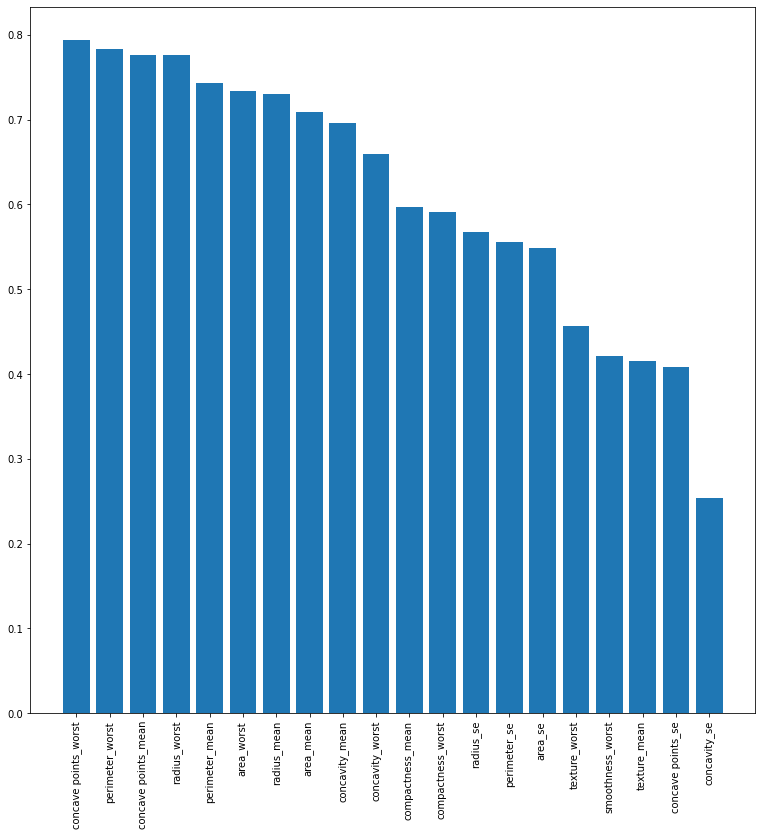

In [ ]:
plt.figure(figsize=(13,13))
plt.bar(corr_data.index[1:], corr_data['corr'][1:])
plt.xticks(rotation=90)



*   target인 진단과 다른 특징의 상관관계를 확인해보았다. 그 값은 약 25~80까지 다양한 것을 볼 수 있다. 하지만 상관관계가 0.50 근처이거나 미만인 것은 사실상 동전 던지기와 비슷하다고 볼 수 있기에 과감히 삭제하도록 하겠다.


In [ ]:
cancer_data.drop(columns=['compactness_mean', 'compactness_worst', 'radius_se', 'perimeter_se', 'area_se', 'texture_worst', 'smoothness_worst', 
                          'texture_mean', 'concave points_se', 'concavity_se'], inplace=True)
cancer_data.columns

Index(['diagnosis', 'radius_mean', 'perimeter_mean', 'area_mean',
       'concavity_mean', 'concave points_mean', 'radius_worst',
       'perimeter_worst', 'area_worst', 'concavity_worst',
       'concave points_worst'],
      dtype='object')



*   이제 남은 columns을 보겠다. radius, perimeter, area 등과 같이 모두 크기 및 둘레에 관한 데이터가 남았다. 따라서 데이터가 기록될 당시 암 판정을 받으신 분들은 모두 어느정도의 크기로 암이 자란 후라는 것을 알 수 있다. 또한 암을 판별하는 과정에서 크기와 형태가 가장 큰 요소가 될 수 있다는 예측을 할 수 있다.(일반적인 암에대한 지식에 대입해보면 이미 전이가 많이 진행되어 손쓰기 어렵다는 이야기를 볼 때 알맞은 feature을 골라낸것같다.)


**PCA**

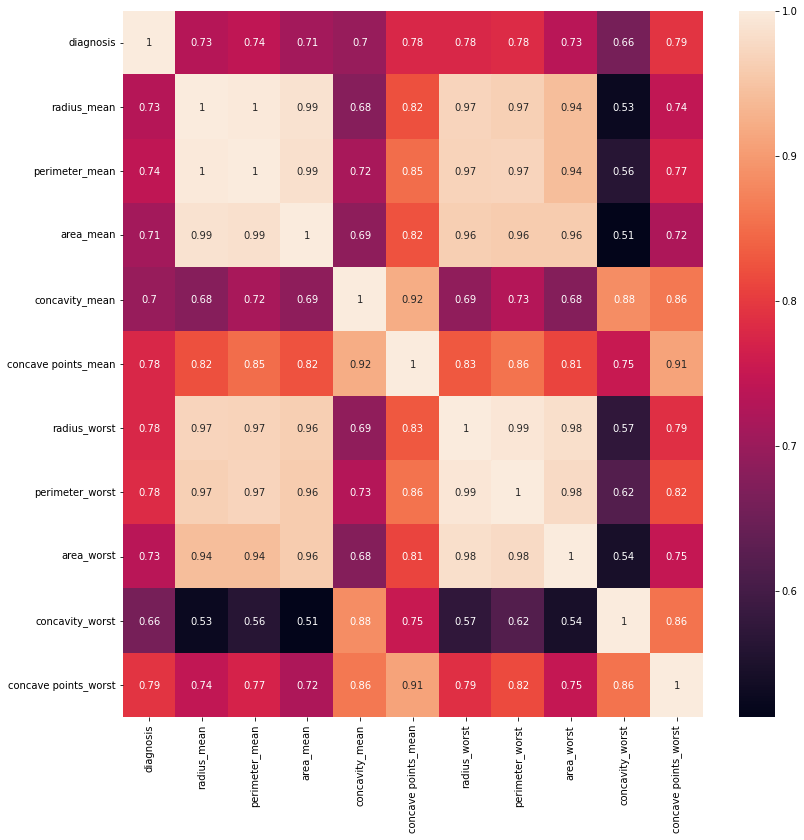

In [ ]:
plt.figure(figsize=(13,13))
sns.heatmap(cancer_data.corr(), annot=True)



*   heatmap을 보다보면 상관관계가 굉장히 높은 데이터들이 보인다. 따라서 상관관계가 0.99 이상인 데이터들을 다시 한 번 걸러주었다.



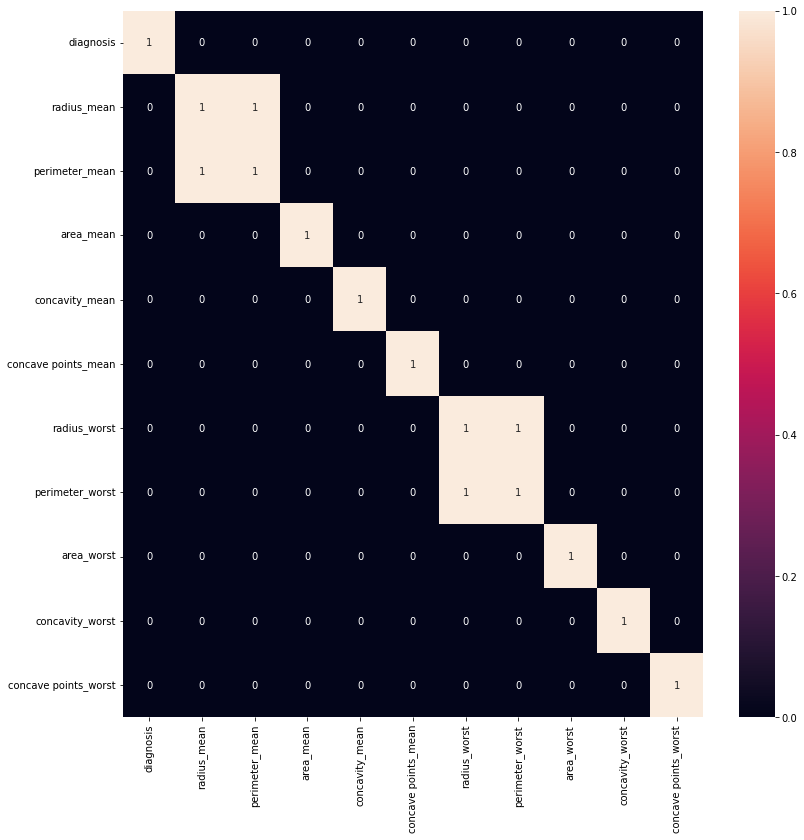

In [ ]:
plt.figure(figsize=(13,13))
sns.heatmap(cancer_data.corr()>0.99, annot=True)



*   상관관계가 높은 데이터가 2쌍이 보인다. 머신러닝의 기법에서 error을 제곱해 각 error별 더 큰 차이를 내는 기법에서 기인해 이번에는 각 데이터들을 곱해주어 새로운 특징을 만들어 볼 것이다.

In [ ]:
cancer_data['radXper'] = cancer_data['radius_mean'] * cancer_data['perimeter_mean']
cancer_data['radXper']

0      2209.1720
1      2733.7530
2      2559.7000
3       885.9636
4      2741.1790
         ...    
564    3061.5200
565    2641.0560
566    1797.7800
567    2886.0600
568     371.8592
Name: radXper, Length: 569, dtype: float64

In [ ]:
cancer_data['radXperW'] = cancer_data['radius_worst'] * cancer_data['perimeter_worst']
cancer_data['radXperW']

0      4685.14800
1      3968.41200
2      3594.42500
3      1474.15170
4      3430.58800
          ...    
564    4227.24500
565    3671.95000
566    2404.76600
567    4751.60400
568     559.41696
Name: radXperW, Length: 569, dtype: float64

In [ ]:
cancer_data.drop(columns=['radius_mean', 'perimeter_mean', 'radius_worst', 'perimeter_worst'], inplace=True)
cancer_data.columns

Index(['diagnosis', 'area_mean', 'concavity_mean', 'concave points_mean',
       'area_worst', 'concavity_worst', 'concave points_worst', 'radXper',
       'radXperW'],
      dtype='object')

**머신러닝을 이용한 학습과 예측**



*   머신러닝의 knn과 svm을 이용하여 데이터를 분류하려고 한다.




  
  **why** KNN & SVM?





*   분류 문제를 해결하는데 여러가지 방법을 사용할 수 있다. 하지만 그 중 K-Nearest Neighborhood는 이웃 사이에서 과반수에 의해 분류되는 모델이다. 즉, 여러 feature과의 거리를 통해 판단한다고 할 수 있다. 유방암 데이터처럼 여러 feature과 label인 진단의 관계를 예측할때에는 이 방법이 효율적이라고 생각해 채택하게 되었다.
*   Support Vector Machine은 support vector을 기반으로 최대 margin을 가지는 hyperlane을 찾는 기법이다. 이 또한 여러 feature이 존재하는 유방암 데이터를 분류할 때 효과적이라고 생각해 채택하였다. 



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(cancer_data.iloc[:,1:], cancer_data.iloc[:,0], random_state=3)

In [ ]:
# validation
cancer_data2.drop(columns=['id', 'Unnamed: 32'], inplace=True)
cancer_data2['diagnosis'] = cancer_data2['diagnosis'].astype('category').cat.codes
X_train2, X_test2, y_train2, y_test2 = train_test_split(cancer_data2.iloc[:,1:], cancer_data2.iloc[:,0], random_state=3)

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9440559440559441

In [ ]:
knn2 = KNeighborsClassifier() # validation
knn2.fit(X_train2, y_train2)
knn2.score(X_test2, y_test2)

0.916083916083916

In [ ]:
svmc = SVC(kernel='linear')
svmc.fit(X_train, y_train)
svmc.score(X_test, y_test)

0.951048951048951

In [ ]:
svmc2 = SVC(kernel='linear') # validation
svmc2.fit(X_train2, y_train2)
svmc2.score(X_test2, y_test2)

0.9440559440559441

In [ ]:
joblib.dump(svmc, 'svm.pkl') 

['svm.pkl']



*   knn과 svm을 사용한 결과 약 94%, 95%의 score로 이전보다 약3%, 1% 증가를 달성하게 되었으며 Overfitting도 방지하게 되었다. 확실한 분류가 되는지 확인하기 위해 전체 데이터에서 random한 데이터를 뽑아 확인해보겠다.(원래는 새로운 데이터를 쓰는게 가장 이상적이지만 이미 test 데이터를 통해 어느 정도 사용할만한 결과가 도출되었으니 확인만 하기 위해 원래 있는 데이터 중 골라 쓰도록 하겠다.)



In [ ]:
cancer_data.iloc[223, :] # 유방암 진단을 받은 사람의 데이터

diagnosis                  1.00000
area_mean                761.30000
concavity_mean             0.11470
concave points_mean        0.06462
area_worst              1088.00000
concavity_worst            0.39760
concave points_worst       0.14790
radXper                 1615.95000
radXperW                2462.60400
Name: 223, dtype: float64

In [ ]:
cancer_data.iloc[520, :] # 유방암 진단을 받지 않은 사람의 데이터

diagnosis                 0.00000
area_mean               257.80000
concavity_mean            0.03332
concave points_mean       0.02421
area_worst              326.60000
concavity_worst           0.09996
concave points_worst      0.07262
radXper                 557.32820
radXperW                717.06880
Name: 520, dtype: float64

In [ ]:
# knn
idx = [223, 520]
for i in idx:
  pred = knn.predict(cancer_data.iloc[i, 1:].to_numpy().reshape(-1, 8))
  if pred[0] == 1:
    print("breast cancer")
  else:
    print('None')

breast cancer
None


In [ ]:
# svm
idx = [223, 520]
for i in idx:
  pred = svmc.predict(cancer_data.iloc[i, 1:].to_numpy().reshape(-1, 8))
  if pred[0] == 1:
    print("breast cancer")
  else:
    print('None')

breast cancer
None


**To Do**



*   위에서 유방암 예측을 진행하였다. 일차적으로 괜찮은 분류가 되었다. 이후에는 이미지를 통한 유방암 판단 모델을 구축할 것이다. 그 후 두 모델을 통한 예측을 가지고 더욱 확실한 유방암 진단을 할 수 있을것으로 예상된다.



# **이미지를 통한 유방암 진단여부 예측**

In [ ]:
import matplotlib.pyplot as plt
import os
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.resnet_v2 import ResNet50V2

**이미지 분리**



*   이미지를 train, validation, test 폴더에 각각 분리하여 넣어주었다.



In [ ]:
images_dir='D:/data/**/*' # 폴더마다 나눠진 모든 이미지 필터링

# 폴더 생성
base_dir = './img'
os.mkdir(base_dir)

img0_dir = os.path.join(base_dir, 'img0')
img1_dir = os.path.join(base_dir, 'img1')
os.mkdir(img0_dir)
os.mkdir(img1_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

train_0_dir = os.path.join(train_dir, 'train0')
os.mkdir(train_0_dir)
train_1_dir = os.path.join(train_dir, 'train1')
os.mkdir(train_1_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

validation_0_dir = os.path.join(validation_dir, 'validation0')
os.mkdir(validation_0_dir)
validation_1_dir = os.path.join(validation_dir, 'validation1')
os.mkdir(validation_1_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

test_0_dir = os.path.join(test_dir, 'test0')
os.mkdir(test_0_dir)
test_1_dir = os.path.join(test_dir, 'test1')
os.mkdir(test_1_dir)

zer_lst = [] # label이 0인 이미지
one_lst = [] # label이 1인 이미지
images = glob('D:/data/**/*.png', recursive=True)
for i in images:
    if 'class0' in i:
        zer_lst.append(i)
    else:
        one_lst.append(i)

# 폴더에 이미지 넣기
frames = ['zero.{}.png'.format(i) for i in range(len(zer_lst))]
for frame in range(len(frames)):
    src = zer_lst[frame]
    dst = os.path.join(img0_dir, frames[frame])
    shutil.copyfile(src, dst)

frames = ['one.{}.png'.format(i) for i in range(len(one_lst))]
for frame in range(len(frames)):
    src = one_lst[frame]
    dst = os.path.join(img1_dir, frames[frame])
    shutil.copyfile(src, dst)

frames = ['zero.{}.png'.format(i) for i in range(99092)]
for frame in frames:
    src = os.path.join(img0_dir, frame)
    dst = os.path.join(train_0_dir, frame)
    shutil.copyfile(src, dst)

frames = ['zero.{}.png'.format(i) for i in range(99092, 111479)]
for frame in frames:
    src = os.path.join(img0_dir, frame)
    dst = os.path.join(validation_0_dir, frame)
    shutil.copyfile(src, dst)

frames = ['zero.{}.png'.format(i) for i in range(111479, 123865)]
for frame in frames:
    src = os.path.join(img0_dir, frame)
    dst = os.path.join(test_0_dir, frame)
    shutil.copyfile(src, dst)

frames = ['one.{}.png'.format(i) for i in range(43248)]
for frame in frames:
    src = os.path.join(img1_dir, frame)
    dst = os.path.join(train_1_dir, frame)
    shutil.copyfile(src, dst)

frames = ['one.{}.png'.format(i) for i in range(43248, 48654)]
for frame in frames:
    src = os.path.join(img1_dir, frame)
    dst = os.path.join(validation_1_dir, frame)
    shutil.copyfile(src, dst)

frames = ['one.{}.png'.format(i) for i in range(48654, 54060)]
for frame in frames:
    src = os.path.join(img1_dir, frame)
    dst = os.path.join(test_1_dir, frame)
    shutil.copyfile(src, dst)

**이미지 분석**

*   정상인 이미지



In [ ]:
f, ax = plt.subplots(4, 7, figsize=(13, 13))
for i in range(4):
    for j in range(7):
        path_0 = zer_lst[i+j]
        img = plt.imread(path_0)
        ax[i, j].imshow(img)
plt.tight_layout()
plt.show()

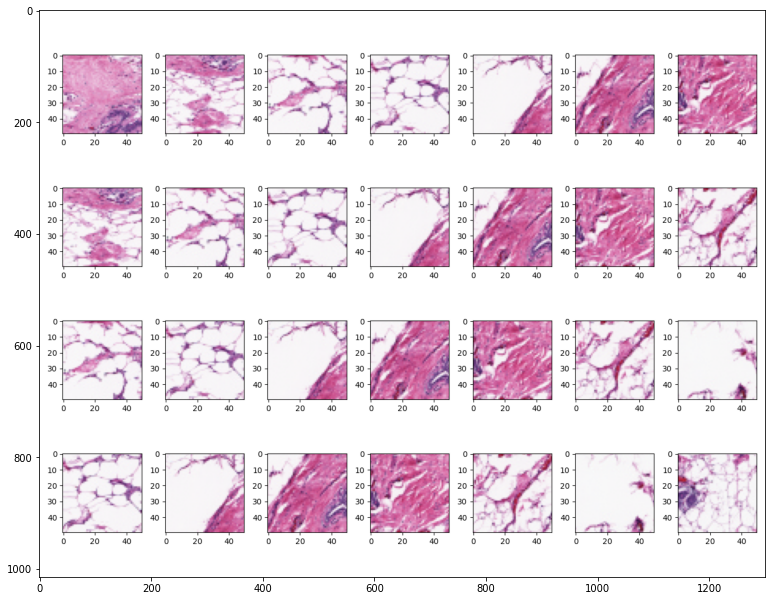

In [ ]:
plt.figure(figsize=(13,13))
img = plt.imread('/content/drive/MyDrive/cancer_0.png')
plt.imshow(img)

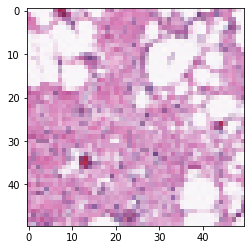

In [ ]:
img0 = plt.imread('/content/drive/MyDrive/zero.83.png')
plt.imshow(img0)



*   환자 이미지



In [ ]:
f, ax = plt.subplots(4, 7, figsize=(13, 13), )
for i in range(4):
    for j in range(7):
        path_1 = one_lst[i+j+20]
        img = plt.imread(path_1)
        ax[i, j].imshow(img)
plt.tight_layout()
plt.show()

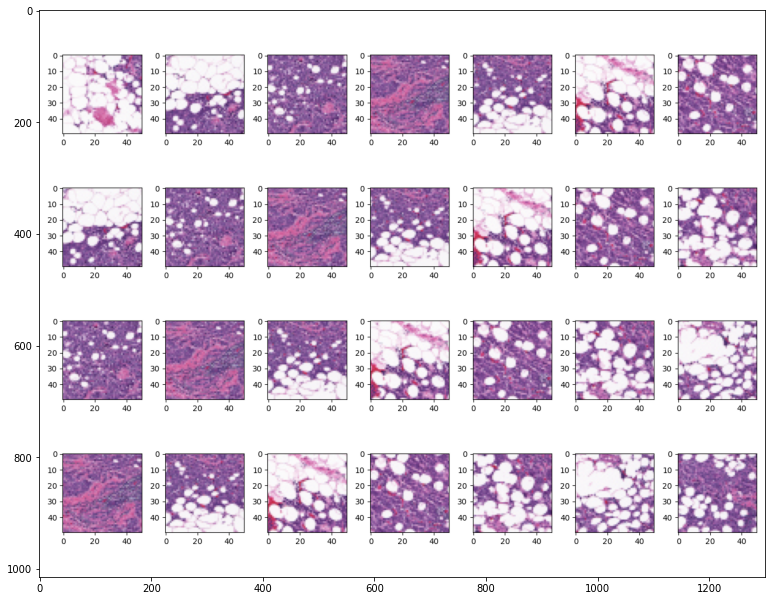

In [ ]:
plt.figure(figsize=(13,13))
img = plt.imread('/content/drive/MyDrive/cancer_1.png')
plt.imshow(img)

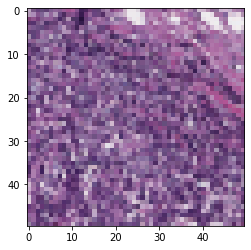

In [ ]:
img1 = plt.imread('/content/drive/MyDrive/one.123.png')
plt.imshow(img1)

**색 분포**



*   정상인 색 분포



(array([   9.,   10.,   51.,  206.,  495.,  702.,  926., 1492., 1695.,
        1914.]),
 array([0.14117648, 0.22627452, 0.31137255, 0.3964706 , 0.48156863,
        0.56666666, 0.6517647 , 0.7368627 , 0.8219608 , 0.90705884,
        0.99215686], dtype=float32),
 <a list of 10 Patch objects>)

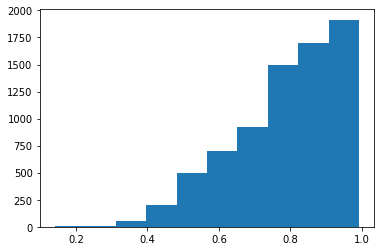

In [ ]:
zer = img0.flatten()
f, ax = plt.subplots()
ax.hist(zer)



*   암환자의 색 분포



(array([  38.,  352.,  783., 1254., 1532., 1556., 1220.,  482.,  160.,
         123.]),
 array([0.07058824, 0.15843138, 0.24627452, 0.33411765, 0.4219608 ,
        0.50980395, 0.5976471 , 0.6854902 , 0.7733333 , 0.8611765 ,
        0.9490196 ], dtype=float32),
 <a list of 10 Patch objects>)

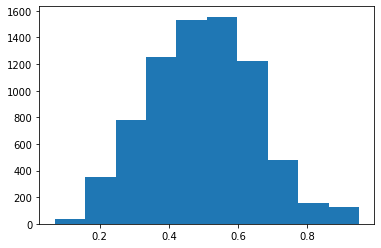

In [ ]:
one = img1.flatten()
f, ax = plt.subplots()
ax.hist(one)

In [ ]:
print(f'regular: {img0.sum()} / cancer: {img1.sum()}')

regular: 5906.2431640625 / cancer: 3729.7294921875




*   정상인의 사진과 비교하였을때 암 환자의 사진은 굉장히 어두운 것을 알 수 있다.



**밀집도**

*   정상인의 밀집도



(array([  5.,   3.,   7.,  13.,  71., 276., 693., 563., 267., 602.]),
 array([0.3019608 , 0.3709804 , 0.44      , 0.5090196 , 0.5780392 ,
        0.64705884, 0.71607846, 0.785098  , 0.85411763, 0.92313725,
        0.99215686], dtype=float32),
 <a list of 10 Patch objects>)

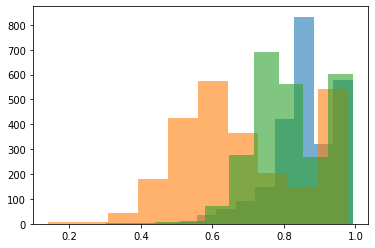

In [ ]:
f, ax = plt.subplots()
ax.hist(img0[:,:,0].flatten(), alpha=0.6)
ax.hist(img0[:,:,1].flatten(), alpha=0.6)
ax.hist(img0[:,:,2].flatten(), alpha=0.6)



*   암환자의 밀집도



(array([  2.,  49., 265., 486., 636., 604., 265., 109.,  45.,  39.]),
 array([0.23529412, 0.30666667, 0.3780392 , 0.44941178, 0.5207843 ,
        0.5921569 , 0.6635294 , 0.73490196, 0.80627453, 0.87764704,
        0.9490196 ], dtype=float32),
 <a list of 10 Patch objects>)

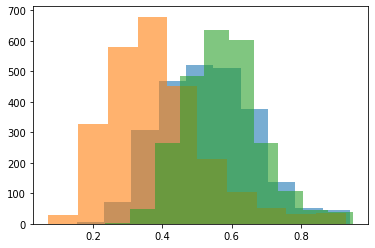

In [ ]:
f, ax = plt.subplots()
ax.hist(img1[:,:,0].flatten(), alpha=0.6)
ax.hist(img1[:,:,1].flatten(), alpha=0.6)
ax.hist(img1[:,:,2].flatten(), alpha=0.6)



*   channel별로 그래프를 그려 세포의 밀집도를 보았다. 이미 위의 사진을 통해 시각적으로 예상했지만, 정상인에 비해 암 환자의 세포 밀집도가 더욱 크다는 것을 알 수 있다.



**모델 제작**



*   CNN model



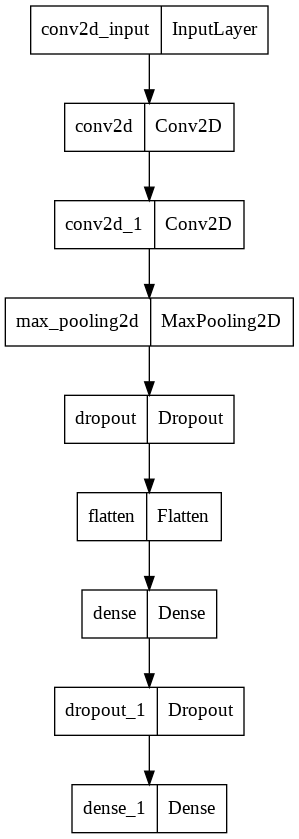

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, 3, activation='relu', input_shape=(50,50,3)))
model.add(layers.Conv2D(64, 3, activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-5), 
              metrics=['accuracy'])

tf.keras.utils.plot_model(model)



*   VGG16 model


58900480/58889256 [==============================] - 2s 0us/step


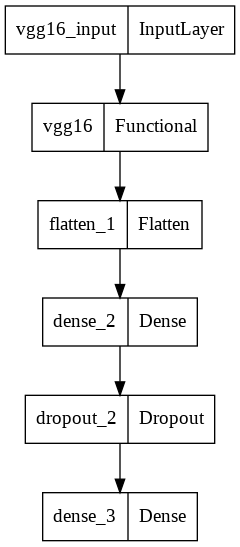

In [ ]:
model = models.Sequential()
model.add(VGG16(weights='imagenet', include_top=False, input_shape=(50,50,3)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-5), 
              metrics=['accuracy'])

tf.keras.utils.plot_model(model)



*   ResNet model



94683136/94668760 [==============================] - 2s 0us/step


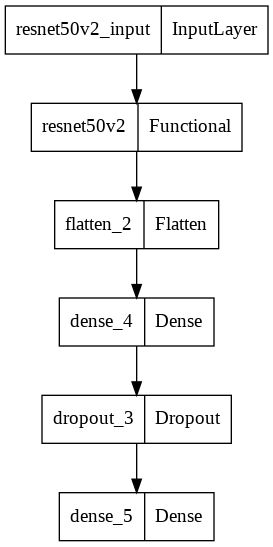

In [ ]:
model = models.Sequential()
model.add(ResNet50V2(weights='imagenet', include_top=False, input_shape=(50,50,3)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-5), 
              metrics=['accuracy'])

tf.keras.utils.plot_model(model)

**data generator**

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(50,50),
    batch_size=40,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(50,50),
    batch_size=40,
    class_mode='binary'
)

**학습**



*   이미지의 수가 적기에 오버피팅이 나기 쉬울것이라고 예상한다. 세포의 색이나, 모양 등이 모두 예측에 작용하는지를 알 수 없기때문에 data augmentation은 최대한 사용하지 않겠다. 모델은 일반 CNN, 그리고 pretrained model인 ResNet, VGG16을 사용하여 결과를 보려고 한다.



In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=60
)
model.save('ResNetTrain.h5')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training vs Validation loss')
plt.legend()
plt.show()

**CNN**

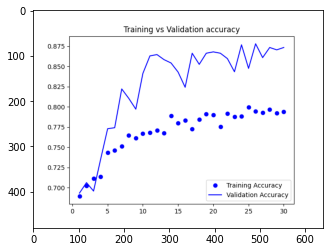

In [ ]:
img = plt.imread('/content/drive/MyDrive/Figure_CNN.png')
plt.imshow(img)

**VGG16**

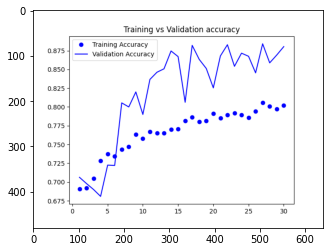

In [ ]:
img = plt.imread('/content/drive/MyDrive/Figure_VGG16.png')
plt.imshow(img)

**ResNet**

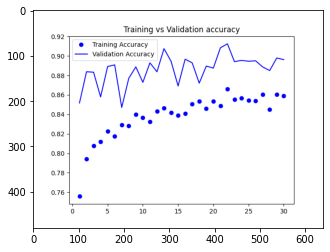

In [ ]:
img = plt.imread('/content/drive/MyDrive/Figure_ResNet.png')
plt.imshow(img)

이미지를 확인해보면 ResNet을 사용한 모델이 가장 높은 validation accuracy를 보인다. 따라서 학습은 ResNet모델을 사용하도록 하겠다.

In [ ]:
loaded_model = models.load_model('/content/drive/MyDrive/ResNetTrain.h5')
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 2, 2, 2048)        23564800  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 128)               1048704   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 24,613,633
Trainable params: 24,568,193
Non-trainable params: 45,440
_________________________________________________________________




*   모델을 학습시키면 약 90% 내외의 validation_accuracy를 얻을 수 있다.


**유방암 진단 함수(데이터, 이미지)**

In [ ]:
def diagnosis(data, image):
  # 데이터 전처리
  data = pd.DataFrame(data).T
  data.drop(columns=['id', 'fractal_dimension_mean', 'texture_se', 'symmetry_se', 'Unnamed: 32',
                     'compactness_se', 'fractal_dimension_se', 'fractal_dimension_worst', 'smoothness_mean', 
                          'smoothness_se', 'symmetry_mean', 'symmetry_worst','compactness_mean', 
                     'compactness_worst', 'radius_se', 'perimeter_se', 'area_se', 'texture_worst', 'smoothness_worst', 
                          'texture_mean', 'concave points_se', 'concavity_se'], inplace=True)
  data['radXper'] = data['radius_mean'] * data['perimeter_mean']
  data['radXperW'] = data['radius_worst'] * data['perimeter_worst']
  data.drop(columns=['radius_mean', 'perimeter_mean', 'radius_worst', 'perimeter_worst'], inplace=True)

  # 모델 구성(학습용)
  # svmc = SVC(kernel='linear')
  # svmc.fit(X_train, y_train)

  # model = models.Sequential()
  # model.add(ResNet50V2(weights='imagenet', include_top=False, input_shape=(50,50,3)))
  # model.add(layers.Flatten())
  # model.add(layers.Dense(128, activation='relu'))
  # model.add(layers.Dropout(0.5))
  # model.add(layers.Dense(1, activation='sigmoid'))
  # model.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
  #               optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-5), 
  #               metrics=['accuracy'])
  
  # history = model.fit_generator(
  #   train_generator,
  #   steps_per_epoch=100,
  #   epochs=30,
  #   validation_data=validation_generator,
  #   validation_steps=60)

  # 모델 로드
  svm_load = joblib.load('/content/drive/MyDrive/svm.pkl')
  resnet_load = models.load_model('/content/drive/MyDrive/ResNetTrain.h5')

  # 예측
  data_pred = svm_load.predict(data.T.to_numpy()[1::].reshape(-1, 8))[0]
  image_pred = resnet_load.predict(image.reshape(-1, 50, 50, 3))[0][0]

  if not data_pred:
    print(f'유방암일 확률은 {int(image_pred*100)}% 입니다.' if image_pred > 0.5 else '의사의 확인이 필요합니다.')
  else:
    print(f'유방암일 확률은 {int(image_pred*100)}% 입니다.' if image_pred <= 0.5 else '의사의 확인이 필요합니다.')

In [ ]:
# data_load
data = pd.read_csv('/content/drive/MyDrive/data.csv', header=0)
img_none = plt.imread('/content/drive/MyDrive/zero.111602.png')
img_cancer = plt.imread('/content/drive/MyDrive/one.48730.png')
data_none = data.iloc[223, :]
data_cancer = data.iloc[520, :]

정상인 진단 데이터
id                          8812877
diagnosis                         M
radius_mean                   15.75
texture_mean                  20.25
perimeter_mean                102.6
area_mean                     761.3
smoothness_mean              0.1025
compactness_mean             0.1204
concavity_mean               0.1147
concave points_mean         0.06462
symmetry_mean                0.1935
fractal_dimension_mean      0.06303
radius_se                    0.3473
texture_se                   0.9209
perimeter_se                  2.244
area_se                       32.19
smoothness_se              0.004766
compactness_se              0.02374
concavity_se                0.02384
concave points_se          0.008637
symmetry_se                 0.01772
fractal_dimension_se       0.003131
radius_worst                  19.56
texture_worst                 30.29
perimeter_worst               125.9
area_worst                   1088.0
smoothness_worst             0.1552
compactness_worst

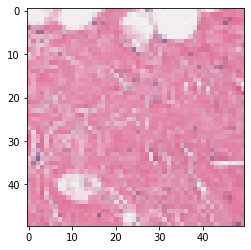

In [ ]:
print('정상인 진단 데이터')
print(data.iloc[223, :])
print('정상인 진단 이미지')
plt.imshow(img_none)

암환자 진단 데이터
id                           917092
diagnosis                         B
radius_mean                   9.295
texture_mean                   13.9
perimeter_mean                59.96
area_mean                     257.8
smoothness_mean              0.1371
compactness_mean             0.1225
concavity_mean              0.03332
concave points_mean         0.02421
symmetry_mean                0.2197
fractal_dimension_mean      0.07696
radius_se                    0.3538
texture_se                     1.13
perimeter_se                  2.388
area_se                       19.63
smoothness_se               0.01546
compactness_se               0.0254
concavity_se                0.02197
concave points_se            0.0158
symmetry_se                 0.03997
fractal_dimension_se       0.003901
radius_worst                  10.57
texture_worst                 17.84
perimeter_worst               67.84
area_worst                    326.6
smoothness_worst              0.185
compactness_worst

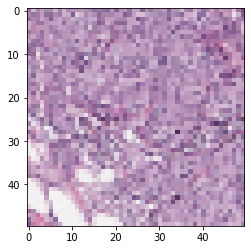

In [ ]:
print('암환자 진단 데이터')
print(data.iloc[520, :])
print('암환자 진단 이미지')
plt.imshow(img_cancer)

In [ ]:
# 정상인 진단
diagnosis(data_none, img_none)

유방암일 확률은 1% 입니다.


In [ ]:
# 암환자 진단
diagnosis(data_cancer, img_cancer)

유방암일 확률은 98% 입니다.


In [ ]:
# 정상인과 암환자의 데이터를 섞었을 때
diagnosis(data_none, img_cancer)

의사의 확인이 필요합니다.


**모델의 한계**



*   ResNet 모델은 90% 내외로 괜찮은 결과를 도출하였다. 동결된 layer의 일부를 trainable하게 바꾸어 학습을 시켰던 모델도 모두 90%의 validation accuracy에서 크게 변하지 않았다. 하지만 실제 현장에 배치하기에는 조금 위험이 있는 수치라고 생각한다.





*   **한계**



1.   적은 데이터로 인해 많은 case를 학습하기 어렵다.
2.   학습에 많은 시간이 소요된다.
3.   전체적으로 validation accuracy가 accuracy보다 높은 것은 underfitting이나 validation data가 예측하기 쉬운 구성일 수 있다.
4.   Accuracy를 높이려면 앙상블이나 hyperparameter을 조정해야 할 것 같다.
5.   이미지에 색 분포에 따른 필터를 먼저 적용하고 학습시켜도 Accuracy가 높아질 것 같다고 예상한다.



**Apply**



*   위 두 예측 모델을 가지고, 사진과 데이터를 넣으면 유방암 진단 결과를 도출해내는 웹사이트를 제작 할 수 있다.
*   의료 현장에사 유방암 진단을 보조할 수 있다.

